# **Exploratory Data Analysis**

Data source: https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset


## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

selecting visualization style

In [2]:
plt.style.use("tableau-colorblind10")

Using Pandas to convert the CSV file into dataframe 

In [3]:
df = pd.read_csv("shopping_trends.csv")
print(f"Columns: {df.shape[1]} & Rows: {df.shape[0]}")
df.head()

Columns: 19 & Rows: 3900


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## **Data Visualization**

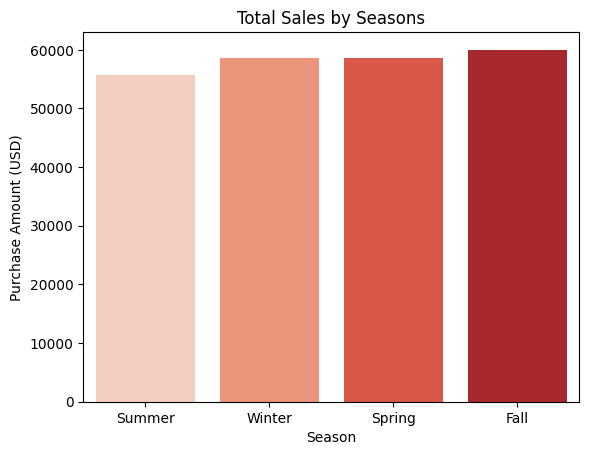

In [4]:
SeP= df.groupby('Season').sum("Purchase Amount (USD)").\
    sort_values("Purchase Amount (USD)").reset_index()

sns.barplot(data=SeP, x="Season", y="Purchase Amount (USD)", 
            estimator='sum', hue="Season", palette= "Reds")

plt.title("Total Sales by Seasons")
plt.show()

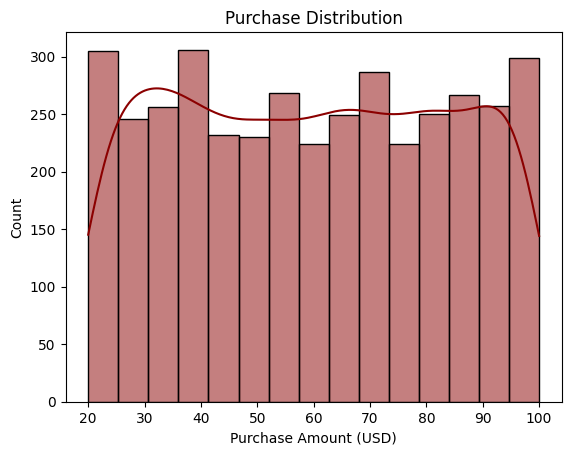

In [5]:
sns.histplot(data=df, x="Purchase Amount (USD)",kde=True, color= "DarkRed")
plt.title("Purchase Distribution")
plt.show()

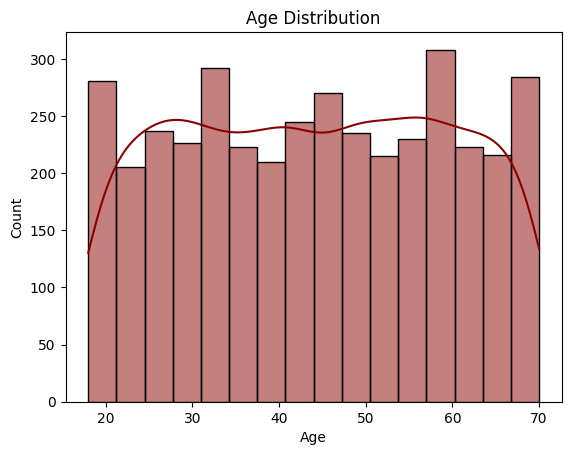

In [6]:
sns.histplot(data=df, x="Age",kde=True, color= "DarkRed")
plt.title("Age Distribution")
plt.show()

In [7]:
GeCo= df['Gender'].value_counts().reset_index()
GeCo.rename(columns={"count":"Count"}, inplace=True)

In [8]:
GeCo

,Gender,Count
0,Male,2652
1,Female,1248


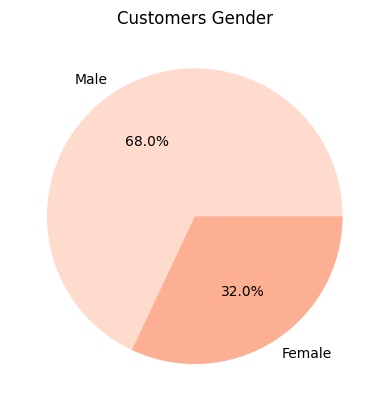

In [9]:
plt.pie(data=GeCo, x="Count", labels="Gender", autopct='%1.1f%%', colors=sns.color_palette('Reds'))

plt.title("Customers Gender")
plt.show()

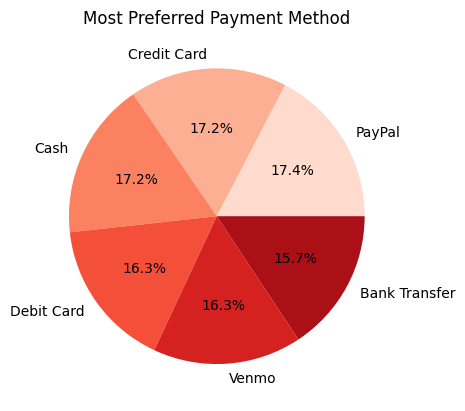

In [10]:
prePay = df["Preferred Payment Method"].value_counts().reset_index()
plt.pie(data=prePay, x="count", labels="Preferred Payment Method", autopct='%1.1f%%', colors=sns.color_palette('Reds'))
plt.title("Most Preferred Payment Method")
plt.show()

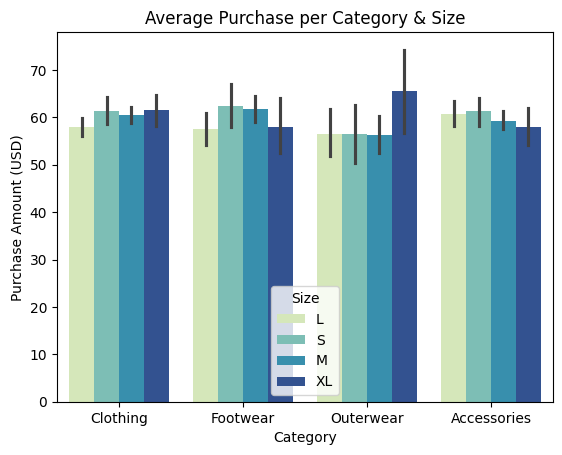

In [11]:
sns.barplot(data=df, x="Category", y="Purchase Amount (USD)", hue="Size", palette="YlGnBu")

plt.title("Average Purchase per Category & Size")
plt.show()

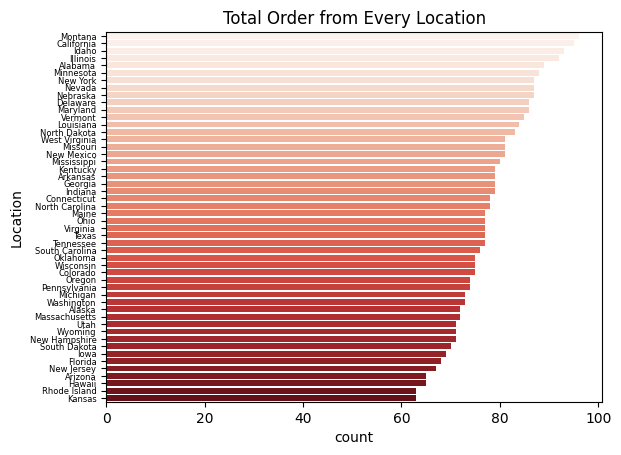

In [12]:
Lo = df["Location"].value_counts().reset_index()

sns.barplot(data=Lo, x="count", y="Location", hue="Location", palette="Reds")
plt.yticks(fontsize=6)
plt.title("Total Order from Every Location")
plt.show()


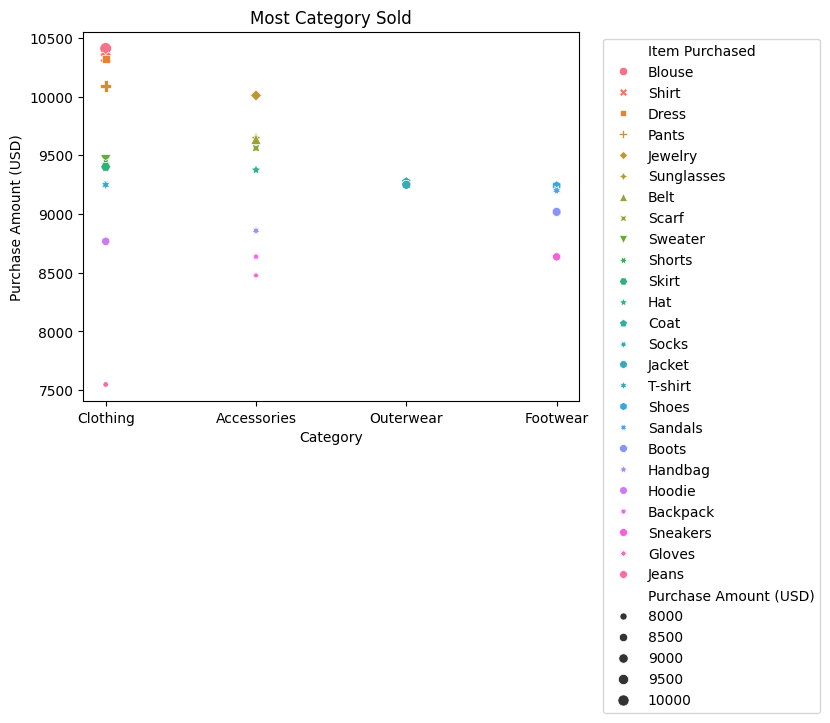

In [13]:
mostCategory = df.groupby(["Category","Item Purchased"]).sum("Purchase Amount (USD)").sort_values("Purchase Amount (USD)", ascending= False)["Purchase Amount (USD)"].reset_index()
sns.scatterplot(data=mostCategory, x= "Category", y= "Purchase Amount (USD)", size="Purchase Amount (USD)", hue= "Item Purchased", style="Item Purchased")
plt.title("Most Category Sold")
plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.show()

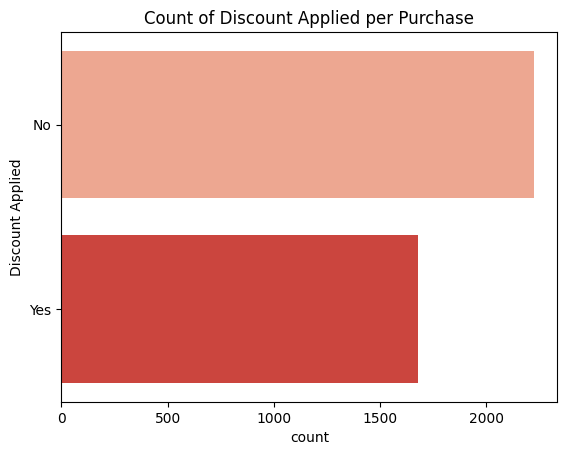

In [14]:
discount= df[["Discount Applied"]].value_counts().reset_index()

sns.barplot(data=discount , x="count", y="Discount Applied", hue="Discount Applied", palette="Reds")
plt.title("Count of Discount Applied per Purchase")
plt.show()

## **Finding Relationships**

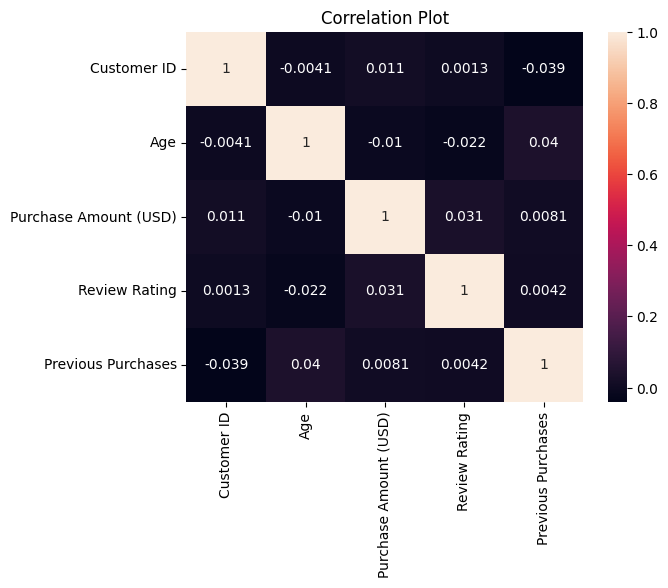

In [15]:
hMap = df.corr(numeric_only=True)

sns.heatmap(hMap, annot= True)

plt.title("Correlation Plot")
plt.show()

In [16]:
colList = list(hMap.columns.values)
colList

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

In [17]:
Cor = df[colList]

In [18]:
Cor

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


In [19]:
from scipy.stats import pearsonr 

In [20]:
correlaion , pvalue =pearsonr(Cor["Age"], Cor["Purchase Amount (USD)"])
print(f"{correlaion} & {pvalue}")

-0.010423647378686531 & 0.5151978241224873


In [21]:
for col in Cor.columns:
    correlaion , pvalue =pearsonr(Cor[col], Cor["Purchase Amount (USD)"])
    print(f"The relation between {col} & Purchase Amount (USD):")
    print(f"Correlation: {correlaion} & P_value: {pvalue}")
    print("")

The relation between Customer ID & Purchase Amount (USD):
Correlation: 0.011047801208478866 & P_value: 0.4903609481414297

The relation between Age & Purchase Amount (USD):
Correlation: -0.010423647378686531 & P_value: 0.5151978241224873

The relation between Purchase Amount (USD) & Purchase Amount (USD):
Correlation: 1.0 & P_value: 0.0

The relation between Review Rating & Purchase Amount (USD):
Correlation: 0.030775923073914448 & P_value: 0.05463157362477281

The relation between Previous Purchases & Purchase Amount (USD):
Correlation: 0.008063412270587704 & P_value: 0.6146783643032144

